#  Install package

In [156]:
# # You may need these
# ! pip install openai
# ! pip install langchain
# ! pip install langchain-openai
# ! pip install langchain-core
# ! pip install osmnx
# ! pip install langchain openai --upgrade
# ! pip install itables
# ! pip install leafmap
# ! jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet
# ! pip install localtileserver 

## May not need these
## ! pip install pyvis
## ! pip install networkx
## ! pip install OSMPythonTools
## ! pip install contextily
## ! pip install matplotlib_scalebar
## ! pip install geojson


# Import package

In [157]:
%load_ext autoreload
%autoreload 2
    
import os
import rasterio
from PIL import Image

import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
# from pyvis.network import Network
from openai import OpenAI
from IPython.display import display, HTML, Code
from IPython.display import clear_output
import matplotlib.pyplot as plt

import base64

import pickle
import sys
import osmnx as ox

import LLM_Find_Constants as constants
import helper

import numpy as np
# from LLM_Find_kernel import Solution

from langchain_openai import ChatOpenAI

# from langchain_core.prompts import ChatPromptTemplate
from time import sleep

OpenAI_key = helper.load_OpenAI_key()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
display(HTML("""
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>
"""))

sleep(0.1)

from itables import init_notebook_mode
from itables import show
# init_notebook_mode(all_interactive=True)

# Input task and data desciption

## Data source 1: OpenStreetMap

In [159]:
## task_name ='Nigeria_cities'
# downloaded_file_name = r'Nigeria_cities.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the city locations of Nigeria; do not download towns.   
# 2. Save the downloaded data as points, save it at: {saved_fname} 
# '''

# task_name ='Nigeria_rivers'
# downloaded_file_name = r'Nigeria_rivers.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the rivers of Nigeria.   
# 2. Save the downloaded data as polylines, save it at: {saved_fname} 
# '''

# task_name ='Nigeria_state_boundary'  # most test failed!!!!! Soloved.
# downloaded_file_name = r'Nigeria_states_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all state boundaries of Nigeria.   
# # 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# # '''

# task_name ='World_country_boundary'  # most test failed!!!!! Soloved.
# downloaded_file_name = r'World_country_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all country boundaries of the world.   
# # 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# # '''


## task_name ='China_mainland_province_boundary'  # most test failed! solved.
# downloaded_file_name = r'China_mainland_Province_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all province boundaries of China mainland.   
# 2. Save the downloaded data as polygons in GeoPackage format at: {saved_fname} 
# '''

## task_name ='OSM_PA_boundary'
# downloaded_file_name = r'PA_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of Pennsylvania State, USA.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

## task_name ='OSM_SC_boundary'
# downloaded_file_name = r'SC_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of South Carolina State, USA.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

# task_name ='OSM_PA_hospital'
# downloaded_file_name = r'PA_hospital.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all hospitals in Pennsylvania, USA.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# '''

## task_name ='SC_hospital'
# downloaded_file_name = r'SC_hospital.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all hospitals in South Carolina, USA.
# 2. Save the downloaded data as points in GeoPackage at: {saved_fname} 
# '''

## task_name ='OSM_SC_school'
# downloaded_file_name = r'SC_school.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all schools in South Carolina State, USA.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# '''

# task_name ='OSM_Yulin_River'
# downloaded_file_name = r'Yulin_river.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all rivers in Yulin, Guangxi, China.
# 2. Save the downloaded data as polylines in GeoPackage format at: {saved_fname} 
# '''

## task_name ='OSM_CA_park'
# downloaded_file_name = r'CA_parks.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all parks in California, USA, including urban public, recreation, state, and national parks.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# # '''

## task_name ='OSM_USA_university'
# downloaded_file_name = r'USA_universities.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the POIs of all universities, colleges, and other higher education institutions in the USA.
# 2. Save the downloaded data as points in GeoPackage format at: {saved_fname} 
# '''

## task_name ='OSM_State_College_street'
# downloaded_file_name = r'State_College_street.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all streets of State College, Pennsylvania, USA.
# 2. Save the downloaded data as polylines in GeoPackage format at: {saved_fname} 
# '''

# ## task_name ='OSM_Nigeria_boundary'
# downloaded_file_name = r'Nigeria_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of Nigeria.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

# ## task_name ='OSM_Afghanistan_boundary'
# downloaded_file_name = r'Afghanistan_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative boundary of Afghanistan.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''


# task_name ='OSM_Nigeria_railway'
# downloaded_file_name = r'Nigeria_railway.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the railway network of Nigeria.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

## task_name ='Wuhan_railway_network'
# downloaded_file_name = r'Wuhan_Railway_network.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the railway network in Wuhan, Hubei, China.
# 2. Save the downloaded data as polylines in GeoPackage format at: {saved_fname} 
# '''
# # Wuhan_railway_network is a difficult case! It succeeded at the beginning, but failed all the time later.
# # The query: area["name"="Wuhan"]["boundary"="administrative"]->.searchArea; is not correct. Need to use "name:en". 
# # Using "Hubei Province" may not return polygons

## task_name ='Qingdao_boundary'
# downloaded_file_name = r'Qingdao_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the administrative of Qingdao, Shandong, China.
# 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# '''

# task_name ='China_Guangdong_province_boundary'   
# downloaded_file_name = r'China_Guangdong_province_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Guangdong province boundaries of China.   
# 2. Save the downloaded data as polygons, save it at: {saved_fname} 
# '''

## task_name ='OSM_coffee_shop_Vietnam'
# downloaded_file_name = r'coffee_shop_Vietnam.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all the coffee shops in Vietnam.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

## Data source 2:  US Census Bureau administrative boundary

In [160]:
## task_name ='Census_SC_tract'
# downloaded_file_name = r'Census_SC_tract.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all census tract boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_blockgroups'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_blockgroups.gpkg'
# if os.path.exists(saved_fname):
#     os.remove(saved_fname)
# task = rf'''1. Download all Census block group boundaries in South Carolina, USA.
# 2. Save the downloaded data as polygons in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_Centre_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_Centre_boundary.gpkg'
# task = rf'''1. Download the administrative boundary of Centre County of Pennsylvania State, USA from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_countries_boundary'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_boundary.gpkg'
# task = rf'''1. Download the administrative boundary of all Counties of South Carolina from Census Bureau.
# 2. Save the downloaded data in GeoPackage format, save it at: {saved_fname} 
# '''

# # task_name ='US_Carolinas_tract"
# downloaded_file_name = r'US_Carolinas_tract.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all the Census tract boundaries of North Carolina and South Carolina in the USA.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

# # task_name ='US_county_boundary"
# downloaded_file_name = r'US_county_boundary.gpkg'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download all the county boundaries in the USA.
# 2. Save the downloaded data in GeoPackage format at: {saved_fname} 
# '''

## Data source 3:  US Census Bureau demographic variables

In [161]:
# task_name ='Census_SC_counties_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_counties_population.csv'
# task = rf'''1. Download latest population for each county in South Carolina.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_SC_Richland_race_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_SC_Richland_race_population.csv'
# task = rf'''1. Download latest population of each race for Richland county in South Carolina, at Census block group level.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_PA_counties_race_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_PA_counties_race_population.csv'
# task = rf'''1. Download latest population by race for all counties in Pennsylvania.
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_states_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_population.csv'
# task = rf'''1. Download latest population for all states in USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_states_education_population'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_states_education_population.csv'
# task = rf'''1. Download latest population by higher education attainment over 25 for all states in USA, together with the entire population of each state.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_county_household_income'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_county_household_income.csv'
# task = rf'''1. Download the latest median household income data for each county in the USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='Census_US_county_population_by_race'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Census_US_county_population_by_race.csv'
# task = rf'''1. Download the latest population by race data for each county in the USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# # task_name ='States_colledge_popultion'   # difficult to get the correct variable combination. 
# downloaded_file_name = r'States_colledge_popultion.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the population over 25 years old and the population with a college degree or higher at the state level of USA for 2012 and 2022.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## task_name ='US_SDOH'   # difficult to get the correct variable combination
# downloaded_file_name = r'US_SDOH.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the social determinators of health, including: 1) population of each race; 2) Median household income; 3) health insurance coverage; 4) Population of speaking only English at home for the population 5 years and over.
# 2. The data should be at the county level in the USA. Year: 2022.
# 3. Save the downloaded data in a CSV file, save it at: {saved_fname} 
# '''

# task_name ='US_County_poverty'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\US_County_poverty.csv'
# task = rf'''1. Download the ratios of income to all poverty level at the county level in the USA. Year: 2022.
# 3. Save the downloaded data in a CSV file, save it at: {saved_fname} 
# '''

## task_name ='Washington_DC_blockgroup_senior_population'
# downloaded_file_name = r'Washington_DC_blockgroup_senior_population.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task_name ='Washington_DC_blockgroup_senior_population'
# task = rf'''1. Download the senior (older than  65) population groups senior  for all Census blockgroups in Washington D.C., USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

# task_name ='School_enrollment'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\School_enrollment_population.csv'
# task = rf'''1. From Census 2020 data, download the school enrollment by level of school for the population 3 years and over of all Census block groups in San Francisco County, California, USA.   
# 2. Save the downloaded data as CSV files, save it at: {saved_fname} 
# '''

##  Data source 4:  COVID-19 accumulative cases by New York Times

In [162]:
## task_name ='COVID_Richland_SC'
# downloaded_file_name = r'COVID_Richland_SC.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the COVID-19 case data of Richland County in South Carolina, USA. The time is from 2021-01 to 2021-09.   
# 2. Save the downloaded data as a CSV file at: {saved_fname} 
# '''

# task_name ='COVID_PA'
# downloaded_file_name = r'COVID_PA.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the COVID-19 case data of all counties in Pennsylvania, USA. The time is from 2021-10 to 2022-02.   
# 2. Save the downloaded data as a CSV file at: {saved_fname} 
# '''

# task_name ='COVID_PA'
# downloaded_file_name = r'COVID_NJ_NY.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the COVID-19 case data of all counties in Pennsylvania State and New York State, USA. The period is entire 2021.   
# 2. Save the downloaded data as a CSV file at: {saved_fname} 
# '''

## Data source 5:  Weather data

In [163]:
## task_name ='OpenWeather_Columbia'
# downloaded_file_name = r'OpenWeather_Columbia.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the historical weather data of Columbia, South Carolina in May 2024.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

# # task_name ='OpenWeather_Yulin_Guangxi'
# downloaded_file_name = r'OpenWeather_Yulin_Guangxi.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the historical weather data of Yulin, Guangxi, China, in May 2024.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## task_name ='OpenWeather_Cairo'
# downloaded_file_name = r'OpenWeather_Cairo.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the current weather data of Cairo, Egypt.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## task_name ='OpenWeather_Kabul'
# downloaded_file_name = r'OpenWeather_Kabul.csv'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 16-day daily forecast weather data of Kabul, Afghanistan.
# 2. Save the downloaded data in CSV format, save it at: {saved_fname} 
# '''

## Data source 6:  Satellite image (ESRI World Imagery (for export))

In [164]:
# task_name ='FAST_Telescope'
downloaded_file_name = r'FAST_Telescope_image.tif'
saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
task = rf'''1. Download the FAST Telescope (Guizhou, China) satellite image at level 18.
2. Save the downloaded data in tiff format, save it at: {saved_fname} 
'''

# # task_name ='Nigeria_image'
# downloaded_file_name = r'Nigeria_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Nigeria satellite image at level 7.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# # task_name ='Qingdao_image'
# downloaded_file_name = r'Qingdao_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Qingdao, Shandong, China satellite image at level 10.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# ## task_name ='Crescent_Moon_Spring'
# downloaded_file_name = r'Crescent_Moon_Spring_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Singing-Sand Mountain and Crescent Moon Spring satellite image at level 16.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Christ the Redeemer'  # this is a point: a difficult case
# downloaded_file_name = r'Christ_the_Redeemer.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Christ the Redeemer satellite image at level 18.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# #task_name ='Brasília_image'   # not ready yet
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Brasília_image.tif'
# task = rf'''1. Download the Brasília satellite image at level 6.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Japan_image'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Japan_image.tif'
# task = rf'''1. Download the Japan satellite image at level 6.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='China'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\China_image.tif'
# task = rf'''1. Download the China satellite image at level 6.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# task_name ='YellowStone_National_Park'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Yellow_Stone_National_Park_image.tif'
# task = rf'''1. Download the YellowStone National Park satellite image at level 10.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Hawaii'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Hawaii_image.tif'
# task = rf'''1. Download the Hawaii State satellite image at level 7.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Honolulu'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Honolulu_image.tif'
# task = rf'''1. Download the Honolulu satellite image at level 12.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Kennedy_Space_Center_Visitor_Complex'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Kennedy_Space_Center_Visitor_Complex_image.tif'
# task = rf'''1. Download the Kennedy Space Center Visitor Complex satellite image at level 18.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Hoover_Dam'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Hoover_Dam_image.tif'
# task = rf'''1. Download the Hoover Dam satellite image at level 18.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Nigeria'
# downloaded_file_name = 'Nigeria_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Nigeria satellite image at level 8.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='Afghanistan'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\Afghanistan_image.tif'
# task = rf'''1. Download the Afghanistan satellite image at level 8.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name ='State_college'
# saved_fname = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Downloaded_Data\State_college_image.tif'
# task = rf'''1. Download the State College City, PA satellite image at level 12.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# #task_name = 'Tigard'
# downloaded_file_name = 'Tigard_OR_image.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Tigard, OR satellite image at level 14.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name = "Xiong'an"
# downloaded_file_name = r'Xiong_an.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Xiong'an New Area, China satellite image at level 12.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name = "Penn_State_University"
# downloaded_file_name = r'Penn_State_University.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the Pennsylvania State University satellite image at level 15.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name = "Mount Everest DOM"
# downloaded_file_name = r'Everest_DOM.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the satellite images of this region [south:27.82, west:86.73, north:28.17, east:87.13] at level 10.
# 2. Save the downloaded data in geo-tiff format, save it at: {saved_fname} 
# '''

## Data source 7:  OpenTopography

In [165]:
## task_name = "Wuhan_DEM"
# downloaded_file_name = r'Wuhan_DEM.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 90m resolution DEM of Wuhan, China from SRTMGL3.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# # task_name = "Chongqing_DEM"
# downloaded_file_name = r'Chongqing_DEM.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 30m resolution DEM of Chongqing, China from SRTMGL1.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# # task_name = "Hawaii_DEM"
# downloaded_file_name = r'Hawaii_DEM.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 90m resolution DEM of Hawaii, USA from SRTMGL3.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''


## task_name = "Lhasa, China_DEM"
# downloaded_file_name = r'Lhasa_DEM.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 30m resolution DEM of Lhasa, China, from COP30.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''


# # task_name = "Iceland"
# downloaded_file_name = r'Iceland_DEM.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 30m resolution DEM of Iceland_DEM from EU_DTM.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

## task_name = "Mount Everest"
# downloaded_file_name = r'Everest_DEM.tif'
# saved_fname = os.path.join(os.getcwd(), "Downloaded_Data", downloaded_file_name)
# task = rf'''1. Download the 30m resolution DEM of this region [south:27.82, west:86.73, north:28.17, east:87.13] from AW3D30.
# 2. Save the downloaded data in tiff format, save it at: {saved_fname} 
# '''

# Fetching data

## Create the model

In [166]:
if os.path.exists(saved_fname):
    os.remove(saved_fname)

save_dir = os.path.join(os.getcwd(), "Downloaded_Data")
os.makedirs(save_dir, exist_ok=True)

model_name = r'gpt-4o'
# model_name = r'gpt-4'
# model_name = r'gpt-4-turbo'
# model_name = r'gpt-3.5-turbo'  # gpt-4-turbo

model = ChatOpenAI(api_key=OpenAI_key, model=model_name, temperature=1)

## Select the data source

In [167]:
# %load_ext autoreload
# %autoreload 2
import helper
    
source_select_prompt_str = helper.create_select_prompt(task=task)

print(source_select_prompt_str)

Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data.
 
Your mission: select a suitable data source from the given list to download the requested geo-spatial data for this task: 1. Download the FAST Telescope (Guizhou, China) satellite image at level 18.
2. Save the downloaded data in tiff format, save it at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Python_code\Downloaded_Data\FAST_Telescope_image.tif 


Requirements: 
1. Return the exact name of the data source as the gi

## Pick up the data source handbook

In [168]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(source_select_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)

print("Select the data source: \n")
print(LLM_reply_str)

Select the data source: 

{'Explanation': "The task requires downloading a satellite image of the FAST Telescope at level 18. Among the given data sources, ESRI World Imagery (for Export) provides satellite image tiles that can be downloaded and mosaicked into a larger image. Therefore, it is the most suitable data source for this task.", "Selected data source": "ESRI World Imagery (for Export)"}


## Generate the data fetching program

In [169]:
import ast
select_source = ast.literal_eval(LLM_reply_str)

selected_data_source= select_source['Selected data source']
data_source_ID = constants.data_source_dict[selected_data_source]['ID']

print("selected_data_source:", selected_data_source)
print("data_source_ID:", data_source_ID)

handbook_list = constants.handbooks[f"{data_source_ID}"]
handbook_str =  '\n'.join([f"{idx + 1}. {line}" for idx, line in enumerate(handbook_list)])
print()
print(f"Handbook:\n{handbook_str}")

selected_data_source: ESRI World Imagery (for Export)
data_source_ID: ESRI_world_imagery

Handbook:
1. The endpoint is: https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{row}/{col}. 'row' is the row number from the top, 'col' is the column number from the left. The map projection is WGS 1984 Web Mercator (auxiliary sphere), EPSG: 3857.
2. Save the downloaded image to a geo-tiff, and write down the bounding box to the geotiff tags.
3. You will receive a place name or a bounding box of the target area.
4. Try not to use `osgeo` Python package; it may have many errors.
5. Put your reply into a Python code block. Explanation or conversation can be Python comments at the begining of the code block(enclosed by ```python and ```).
6. The download code is only in a function named 'download_data()'. The last line is to execute this function; do not use `if __name__ == '__main__':`.
7. If the requested area is provided as a place name, search its bounding b

In [170]:
# %load_ext autoreload
# %autoreload 2

download_prompt_str = helper.create_download_prompt(task, selected_data_source, handbook_str)

print(download_prompt_str)

Your role: A professional Python programmer in geographic information science (GIScience). You have worked on GIScience for more than 20 years and know every detail and pitfall when collecting data and coding. You know which websites you can get suitable spatial data and know the methods or tricks to download data, such as OpenStreetMap, Census Bureau, or various APIs. You are also experienced in processing the downloaded data, including saving them in suitable formats, map projections, and creating detailed and useful meta-data. When downloading geo-spatial data, the technical handbook for a particular data source is provided; you can follow it, and write Python code carefully to download the data. 
 
Your mission: download geo-spatial data from the given data source for this task: 1. Download the FAST Telescope (Guizhou, China) satellite image at level 18.
2. Save the downloaded data in tiff format, save it at: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc

In [171]:
from IPython.display import clear_output

chunks = []

async for chunk in model.astream(download_prompt_str):
    chunks.append(chunk)
    print(chunk.content, end="", flush=True)

# clear_output(wait=True)
clear_output(wait=False)
LLM_reply_str = helper.convert_chunks_to_str(chunks=chunks)
print(LLM_reply_str)

```python
import requests
import numpy as np
from PIL import Image
import os
import json
from pyproj import Transformer
import rasterio
from rasterio.transform import from_bounds
import osmnx as ox

def download_data():
    # Define the target area
    place = 'FAST Telescope, Guizhou, China'

    # Get the boundary of the FAST Telescope area from OpenStreetMap
    ox.config(log_console=True, use_cache=True)
    url = f"https://nominatim.openstreetmap.org/search?q={place}&format=geojson"
    response = requests.get(url, headers={"User-Agent": "LLM-Find/gladcolor@gmail.com"})
    bbox = response.json()['features'][0]['bbox']
    minx, miny, maxx, maxy = bbox

    # Ensure the bounding box is not too small
    if abs(maxx - minx) < 0.000001:
        ext = 0.00005
        maxx += ext
        minx -= ext
        maxy += ext
        miny -= ext

    # Set the zoom level to 18
    z = 18
    n = 2 ** z

    # Calculate the tiling scheme boundaries
    tile_min_col = int((minx + 180.0) / 360.

In [172]:
code = helper.extract_code_from_str(LLM_reply_str, task)
display(Code(code, language='python'))

import requests
import numpy as np
from PIL import Image
import os
import json
from pyproj import Transformer
import rasterio
from rasterio.transform import from_bounds
import osmnx as ox

def download_data():
    # Define the target area
    place = 'FAST Telescope, Guizhou, China'

    # Get the boundary of the FAST Telescope area from OpenStreetMap
    ox.config(log_console=True, use_cache=True)
    url = f"https://nominatim.openstreetmap.org/search?q={place}&format=geojson"
    response = requests.get(url, headers={"User-Agent": "LLM-Find/gladcolor@gmail.com"})
    bbox = response.json()['features'][0]['bbox']
    minx, miny, maxx, maxy = bbox

    # Ensure the bounding box is not too small
    if abs(maxx - minx) < 0.000001:
        ext = 0.00005
        maxx += ext
        minx -= ext
        maxy += ext
        miny -= ext

    # Set the zoom level to 18
    z = 18
    n = 2 ** z

    # Calculate the tiling scheme boundaries
    tile_min_col = int((minx + 180.0) / 360.0 * n)
   

import requests
import numpy as np
from PIL import Image
import os
import json
from pyproj import Transformer
import rasterio
from rasterio.transform import from_bounds
import osmnx as ox

def download_data():
    # Define the target area
    place = 'FAST Telescope, Guizhou, China'

    # Get the boundary of the FAST Telescope area from OpenStreetMap
    ox.config(log_console=True, use_cache=True)
    url = f"https://nominatim.openstreetmap.org/search?q={place}&format=geojson"
    response = requests.get(url, headers={"User-Agent": "LLM-Find/gladcolor@gmail.com"})
    bbox = response.json()['features'][0]['bbox']
    minx, miny, maxx, maxy = bbox

    # Ensure the bounding box is not too small
    if abs(maxx - minx) < 0.000001:
        ext = 0.00005
        maxx += ext
        minx -= ext
        maxy += ext
        miny -= ext

    # Set the zoom level to 18
    z = 18
    n = 2 ** z

    # Calculate the tiling scheme boundaries
    tile_min_col = int((minx + 180.0) / 360.0 * n)
    tile_max_col = int((maxx + 180.0) / 360.0 * n)
    tile_min_row = int((1.0 - np.log(np.tan(np.radians(maxy)) + 1 / np.cos(np.radians(maxy))) / np.pi) / 2.0 * n)
    tile_max_row = int((1.0 - np.log(np.tan(np.radians(miny)) + 1 / np.cos(np.radians(miny))) / np.pi) / 2.0 * n)

    # Create directory to store individual tile images
    save_dir = "tiles"
    os.makedirs(save_dir, exist_ok=True)

    # Download tiles
    for row in range(tile_min_row, tile_max_row + 1):
        for col in range(tile_min_col, tile_max_col + 1):
            url = f"https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{row}/{col}"
            response = requests.get(url)
            tile_path = os.path.join(save_dir, f"{z}-{row}-{col}.jpg")
            with open(tile_path, 'wb') as f:
                f.write(response.content)

    # Stitch the tiles to create a mosaic image
    cols = tile_max_col - tile_min_col + 1
    rows = tile_max_row - tile_min_row + 1
    tile_width, tile_height = Image.open(os.path.join(save_dir, f"{z}-{tile_min_row}-{tile_min_col}.jpg")).size
    mosaic = Image.new('RGB', (cols * tile_width, rows * tile_height))

    for row in range(rows):
        for col in range(cols):
            tile_path = os.path.join(save_dir, f"{z}-{tile_min_row + row}-{tile_min_col + col}.jpg")
            tile = Image.open(tile_path)
            mosaic.paste(tile, (col * tile_width, row * tile_height))

    # Save the mosaic image as a TIFF file
    image_array = np.array(mosaic)

    # Calculate the actual geographic bounds of the mosaic
    def tile_to_lonlat(col, row, zoom):
        n = 2.0 ** zoom
        lon_deg = col / n * 360.0 - 180.0
        lat_rad = np.arctan(np.sinh(np.pi * (1 - 2 * row / n)))
        lat_deg = np.degrees(lat_rad)
        return lon_deg, lat_deg

    actual_min_lon, actual_max_lat = tile_to_lonlat(tile_min_col, tile_min_row, z)
    actual_max_lon, actual_min_lat = tile_to_lonlat(tile_max_col + 1, tile_max_row + 1, z)

    # Convert geographic bounds to Web Mercator
    transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
    actual_min_x, actual_min_y = transformer.transform(actual_min_lon, actual_min_lat)
    actual_max_x, actual_max_y = transformer.transform(actual_max_lon, actual_max_lat)

    # Set the bounding box for Web Mercator
    actual_bounding_box_mercator = actual_min_x, actual_min_y, actual_max_x, actual_max_y
    print("Actual Bounding Box in Web Mercator:", actual_bounding_box_mercator)
    
    transform = from_bounds(*actual_bounding_box_mercator, width=mosaic.width, height=mosaic.height)

    mosaic_path = "E:/OneDrive_PSU/OneDrive - The Pennsylvania State University/Research_doc/LLM-Find/Python_code/Downloaded_Data/FAST_Telescope_image.tif"
    crs = {'init': 'epsg:3857'}

    # Save the image as a GeoTIFF using rasterio
    with rasterio.open(
        mosaic_path,
        'w',
        driver='GTiff',
        height=image_array.shape[0],
        width=image_ar

# Execute the generated program

In [173]:
# %autoreload 2
# %load_ext autoreload

code = code.replace('area({osm_id})->.searchArea;', 'relation({osm_id}); map_to_area->.searchArea;')  # GPT-4o never follow the related instruction!
    
code = helper.execute_complete_program(code=code, try_cnt=10, task=task, model_name=model_name, handbook_str=handbook_str)

code = code.replace('area({osm_id})->.searchArea;', 'relation({osm_id}); map_to_area->.searchArea;')  # GPT-4o never follow the related instruction!


display(Code(code, language='python'))




-------------- Running code (trial # 1/10) --------------


Actual Bounding Box in Web Mercator: (11894824.593625987, 2955819.8837877656, 11895588.96390884, 2956584.254070617)


--------------- Done ---------------




import requests
import numpy as np
from PIL import Image
import os
import json
from pyproj import Transformer
import rasterio
from rasterio.transform import from_bounds
import osmnx as ox

def download_data():
    # Define the target area
    place = 'FAST Telescope, Guizhou, China'

    # Get the boundary of the FAST Telescope area from OpenStreetMap
    ox.config(log_console=True, use_cache=True)
    url = f"https://nominatim.openstreetmap.org/search?q={place}&format=geojson"
    response = requests.get(url, headers={"User-Agent": "LLM-Find/gladcolor@gmail.com"})
    bbox = response.json()['features'][0]['bbox']
    minx, miny, maxx, maxy = bbox

    # Ensure the bounding box is not too small
    if abs(maxx - minx) < 0.000001:
        ext = 0.00005
        maxx += ext
        minx -= ext
        maxy += ext
        miny -= ext

    # Set the zoom level to 18
    z = 18
    n = 2 ** z

    # Calculate the tiling scheme boundaries
    tile_min_col = int((minx + 180.0) / 360.0 * n)
    tile_max_col = int((maxx + 180.0) / 360.0 * n)
    tile_min_row = int((1.0 - np.log(np.tan(np.radians(maxy)) + 1 / np.cos(np.radians(maxy))) / np.pi) / 2.0 * n)
    tile_max_row = int((1.0 - np.log(np.tan(np.radians(miny)) + 1 / np.cos(np.radians(miny))) / np.pi) / 2.0 * n)

    # Create directory to store individual tile images
    save_dir = "tiles"
    os.makedirs(save_dir, exist_ok=True)

    # Download tiles
    for row in range(tile_min_row, tile_max_row + 1):
        for col in range(tile_min_col, tile_max_col + 1):
            url = f"https://services.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{row}/{col}"
            response = requests.get(url)
            tile_path = os.path.join(save_dir, f"{z}-{row}-{col}.jpg")
            with open(tile_path, 'wb') as f:
                f.write(response.content)

    # Stitch the tiles to create a mosaic image
    cols = tile_max_col - tile_min_col + 1
    rows = tile_max_row - tile_min_row + 1
    tile_width, tile_height = Image.open(os.path.join(save_dir, f"{z}-{tile_min_row}-{tile_min_col}.jpg")).size
    mosaic = Image.new('RGB', (cols * tile_width, rows * tile_height))

    for row in range(rows):
        for col in range(cols):
            tile_path = os.path.join(save_dir, f"{z}-{tile_min_row + row}-{tile_min_col + col}.jpg")
            tile = Image.open(tile_path)
            mosaic.paste(tile, (col * tile_width, row * tile_height))

    # Save the mosaic image as a TIFF file
    image_array = np.array(mosaic)

    # Calculate the actual geographic bounds of the mosaic
    def tile_to_lonlat(col, row, zoom):
        n = 2.0 ** zoom
        lon_deg = col / n * 360.0 - 180.0
        lat_rad = np.arctan(np.sinh(np.pi * (1 - 2 * row / n)))
        lat_deg = np.degrees(lat_rad)
        return lon_deg, lat_deg

    actual_min_lon, actual_max_lat = tile_to_lonlat(tile_min_col, tile_min_row, z)
    actual_max_lon, actual_min_lat = tile_to_lonlat(tile_max_col + 1, tile_max_row + 1, z)

    # Convert geographic bounds to Web Mercator
    transformer = Transformer.from_crs("epsg:4326", "epsg:3857", always_xy=True)
    actual_min_x, actual_min_y = transformer.transform(actual_min_lon, actual_min_lat)
    actual_max_x, actual_max_y = transformer.transform(actual_max_lon, actual_max_lat)

    # Set the bounding box for Web Mercator
    actual_bounding_box_mercator = actual_min_x, actual_min_y, actual_max_x, actual_max_y
    print("Actual Bounding Box in Web Mercator:", actual_bounding_box_mercator)
    
    transform = from_bounds(*actual_bounding_box_mercator, width=mosaic.width, height=mosaic.height)

    mosaic_path = "E:/OneDrive_PSU/OneDrive - The Pennsylvania State University/Research_doc/LLM-Find/Python_code/Downloaded_Data/FAST_Telescope_image.tif"
    crs = {'init': 'epsg:3857'}

    # Save the image as a GeoTIFF using rasterio
    with rasterio.open(
        mosaic_path,
        'w',
        driver='GTiff',
        height=image_array.shape[0],
        width=image_ar

# Show the downloaded data

In [174]:
ext_name = saved_fname[-4:]
print("Saved file:", saved_fname)
print("ext_name:", ext_name)

Saved file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\LLM-Find\Python_code\Downloaded_Data\FAST_Telescope_image.tif
ext_name: .tif


In [175]:
# import leafmap.leafmap as leafmap
import leafmap.foliumap as leafmap

# m = leafmap.Map(google_map="HYBRID")
# m = leafmap.Map()

if ext_name == 'gpkg':
    gdf = gpd.read_file(saved_fname)  
    bounding_box = gdf.total_bounds
    m = leafmap.Map()     
    m.add_gdf(gdf, layer_name="Downloaded_data")
    m.fit_bounds([[bounding_box[1], bounding_box[0]], [bounding_box[3], bounding_box[2]]])

if selected_data_source == 'OpenTopography':
    # m = leafmap.Map()
    m = leafmap.Map(google_map="HYBRID")
    m.add_raster(source=saved_fname, layer_name='OpenTopography DEM', colormap='viridis') 

if selected_data_source == 'ESRI World Imagery (for Export)':
   m = leafmap.Map(google_map="HYBRID")
   m.add_raster(source=saved_fname, layer_name='ESRI World Imagery') 

m

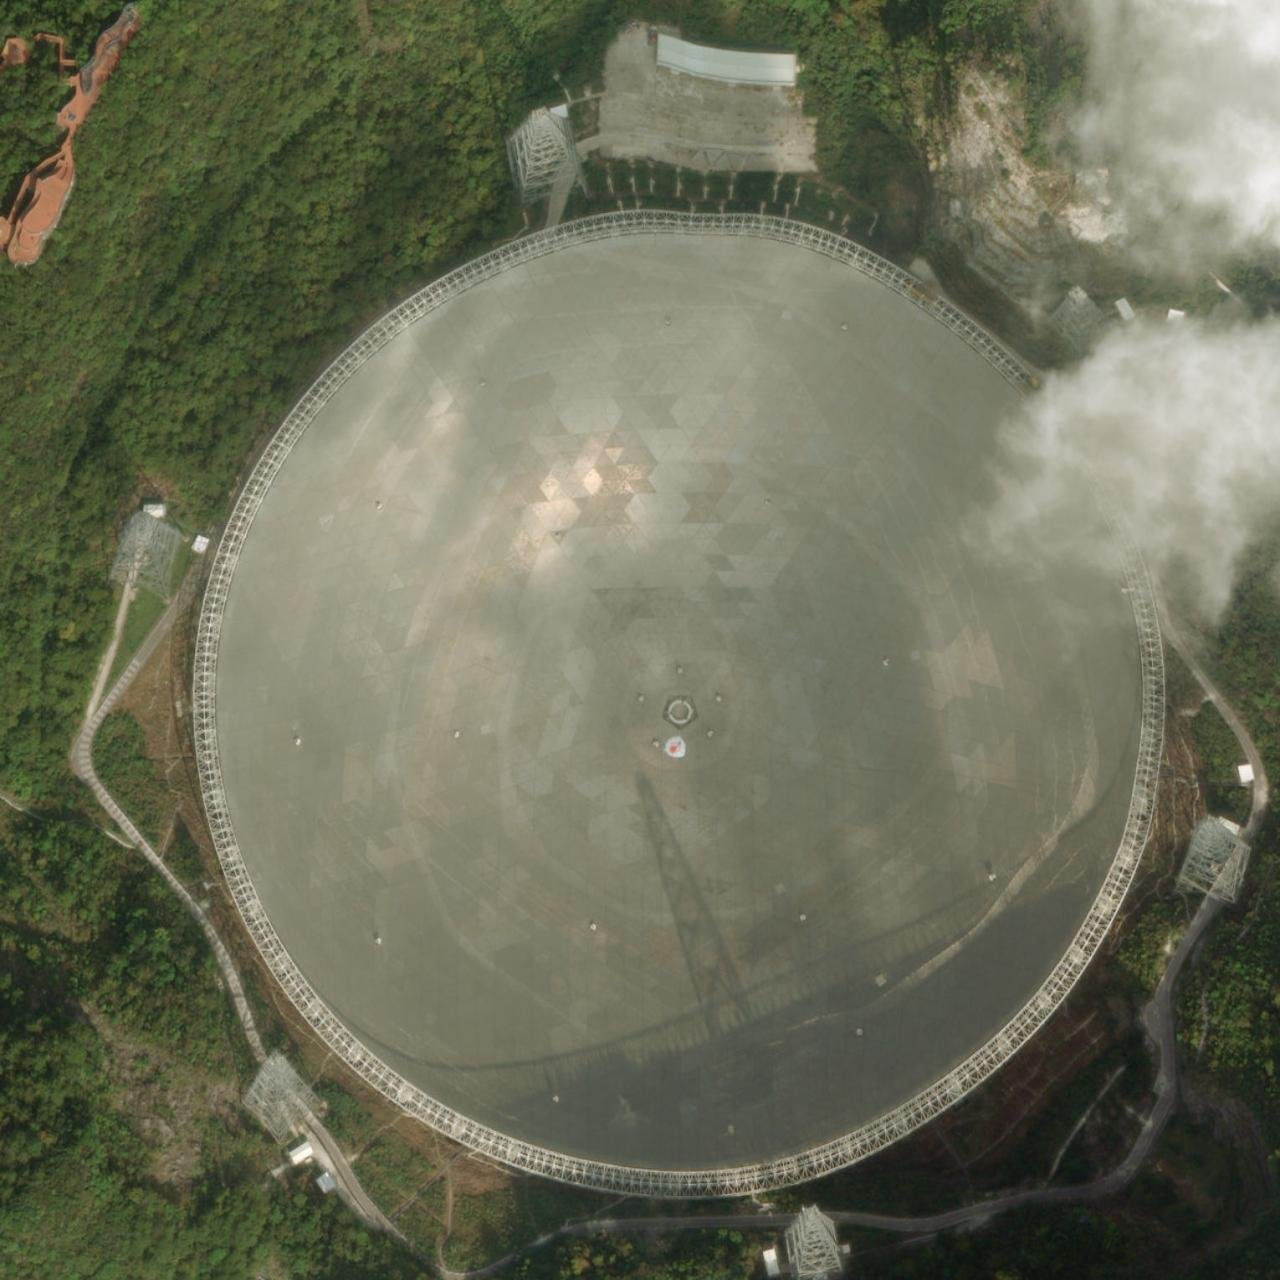

In [176]:
if ext_name == '.csv':
    df = pd.read_csv(saved_fname, encoding='ISO-8859-1')
    results = df

if ext_name == 'gpkg':
    gdf = gpd.read_file(saved_fname)
    results = gdf
    # gdf.plot()
    # gdf.explore()

if selected_data_source == 'ESRI World Imagery (for Export)':
    results = Image.open(saved_fname)
    
results

In [177]:
### If you do not like to install Leafmap or have difficulty to install it, 
### just use gdf.explore() to check the downloaded data in an interative way
# gdf.explore()